In [1271]:
using QuantumStates, UnitsToValue, DataFrames

### Load Hamiltonian

In [1290]:
H = load_from_file("CaF_X_v0", "C://Google Drive//github//QuantumStates//Hamiltonians//CaF//")

# Add AC Stark effect from trap
au = 1.64877727436e-41
w = 2.2e-6; P = @with_unit 0.150 "W"; I_trap = 2P / (π * w^2);
α_par = 142.6
α_perp = 234.6
const α = [(1/3)*(α_par + 2α_perp), 0, (2/3)*(α_par - α_perp)] .* au
const θ = π/2
const ϵ_trap = cos(θ) * [0.0, 1.0, 0.0] + sin(θ) * [1.0, 0.0, -1.0] / √2
scalar_polarizability(state, state′) = polarizability(state, state′, α .* [1,0,0], ϵ_trap)
tensor_polarizability(state, state′) = polarizability(state, state′, α .* [0,0,1], ϵ_trap)
H = add_to_H(H, :I_scalar, (1e-6 / h) * scalar_polarizability)
H = add_to_H(H, :I_tensor, (1e-6 / h) * tensor_polarizability)

# Add DC Stark effect
const μX = 1e-6 * 1.458 * (1e-21 / c) / h
H = add_to_H(H, :E, (1e2 * μX) * Stark) # 1e2 converts from V/m to V/cm

# Add Zeeman effect
Zeeman_z(state, state′) = Zeeman(state, state′, 0)
H = add_to_H(H, :B_z, gS * (1e-10 * μ_B / h) * Zeeman_z)
;

In [1308]:
H.parameters.E = 0.
H.parameters.B_z = 1.5
H.parameters.I_scalar = 1I_trap / (2ε_0 * c)
H.parameters.I_tensor = 1I_trap / (2ε_0 * c)
full_evaluate!(H)
solve!(H)
;

In [1309]:
QN_bounds = (S = 1/2, I = 1/2, Λ = 0, N = 0:3)
basis_uncoupled = enumerate_states(HundsCaseB_Decoupled, QN_bounds)
states_uncoupled = convert_basis(H.states, basis_uncoupled)
;

In [1310]:
# Option 1: E = 0, B = 100, idxs = 3, 14, 13

In [1311]:
# |0⟩ state
idx_0 = 3
state = H.states[idx_0]
1e-3 * (1e2 * μX) * 1e6 * d(H.states[idx_0], H.states[idx_0]) |> display
1e-3 * gS * (1e-4 * μ_B / h) * TDM_magnetic(H.states[idx_0], H.states[idx_0], 0) |> display
state |> display
energy(state) |> display

-1.465862533320229e-20 + 0.0im

48.035674231844794 + 0.0im

State{HundsCaseB_Rot}(11.814372986386914, HundsCaseB_Rot[HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 0, 0, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, -1, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, 0, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, 1, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 0, 0, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, -1, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, 0, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, 1, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 3/2, 1, -1, (N = 0:

11.814372986386914

In [1312]:
# |1⟩ state
idx_1 = 8
state = H.states[idx_1]
1e-3 * (1e2 * μX) * 1e6 * d(H.states[idx_1], H.states[idx_1]) |> display
1e-3 * gS * (1e-4 * μ_B / h) * TDM_magnetic(H.states[idx_1], H.states[idx_1], 0) |> display
state |> display
energy(state) |> display

7.748914078981566e-14 + 0.0im

-95.38270145222786 + 0.0im

State{HundsCaseB_Rot}(20566.56090743797, HundsCaseB_Rot[HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 0, 0, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, -1, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, 0, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, 1, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 0, 0, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, -1, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, 0, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, 1, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 3/2, 1, -1, (N = 0:∞

20566.56090743797

In [1313]:
# |e⟩ state
idx_e = 16
state = H.states[idx_e]
1e-3 * (1e2 * μX) * 1e6 * d(H.states[idx_e], H.states[idx_e]) |> display
1e-3 * gS * (1e-4 * μ_B / h) * TDM_magnetic(H.states[idx_e], H.states[idx_e], 0) |> display
state |> display
energy(state) |> display

1.579621597576393e-13 + 0.0im

1345.069029347295 + 0.0im

State{HundsCaseB_Rot}(20641.091212804517, HundsCaseB_Rot[HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 0, 0, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, -1, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, 0, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 0, 1/2, 1, 1, (N = 0:∞, J = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 0, 0, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, -1, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, 0, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 1/2, 1, 1, (N = 0:∞, J = 0.5:1.0:1.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseB_Rot(0.0, 1/2, 1/2, 0, 1, 3/2, 1, -1, (N = 0:

20641.091212804517

In [1314]:
TDM(H.states[idx_0], H.states[idx_1], 0) |> display
TDM(H.states[idx_0], H.states[idx_e], 0) |> display
TDM(H.states[idx_1], H.states[idx_e], 0) |> display

-0.33783162224634555 + 0.0im

-0.09684522099219783 + 0.0im

1.4916955311417485e-16 + 0.0im

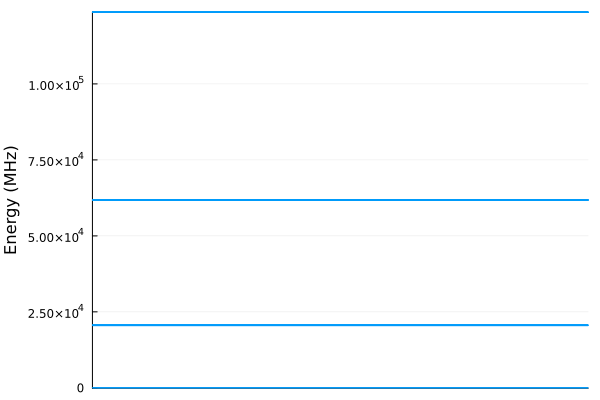

In [1315]:
using Plots
hline(energy.(H.states), legend=nothing)
plot!(
    xticks=nothing,
    ylabel="Energy (MHz)",
)

### Stark plots

In [1316]:
function H_func!(H, scan_values)
    H.parameters.E = scan_values[1]
    evaluate!(H)
    solve!(H)
    return nothing
end
;

In [1317]:
Es = (1e-6:0.0001:0.01)
scan_params = (
    E = Es,
    );
iterator = Iterators.product
@time scan_values, tracked_idxs = scan_parameters(deepcopy(H), scan_params, iterator, H_func!, H -> energy.(H.states), n_threads=10)
matrix_values = hcat(values(scan_values)...)'
;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


  0.760293 seconds (289.63 k allocations: 69.116 MiB, 7.00% gc time, 400.19% compilation time)


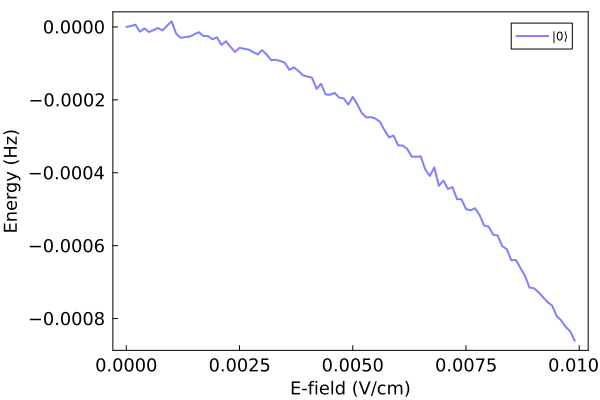

In [1318]:
using Plots, LaTeXStrings
Es_rel = matrix_values .- matrix_values[1,:]'
plot(Es, 1e6 .* Es_rel[:,idx_0], linewidth=2, linecolor=:blue, alpha=0.5, label="|0⟩")
# plot!(Es, 1e6 .* Es_rel[:,idx_1], linewidth=2, linecolor=:green, alpha=0.5, label="|1⟩")
# plot!(Es, 1e6 .* Es_rel[:,idx_e], linewidth=2, linecolor=:red, alpha=0.5, label="|e⟩")
plot!(
    xlabel="E-field (V/cm)",
    ylabel="Energy (Hz)",
    labelfontsize=12,
    tickfontsize=12,
    grid=:off,
    box=:on
)

### Zeeman plots

In [1319]:
function H_func!(H, scan_values)
    H.parameters.B_z = scan_values[1]
    evaluate!(H)
    solve!(H)
    return nothing
end
;

In [1326]:
Bs = H.parameters.B_z .+ (0:0.1:10) .* 1e-3
scan_params = (
    B = Bs,
    );
iterator = Iterators.product
@time scan_values, tracked_idxs = scan_parameters(deepcopy(H), scan_params, iterator, H_func!, H -> energy.(H.states), n_threads=10)
matrix_values = hcat(values(scan_values)...)'
;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


  0.607672 seconds (278.98 k allocations: 68.744 MiB, 398.54% compilation time)


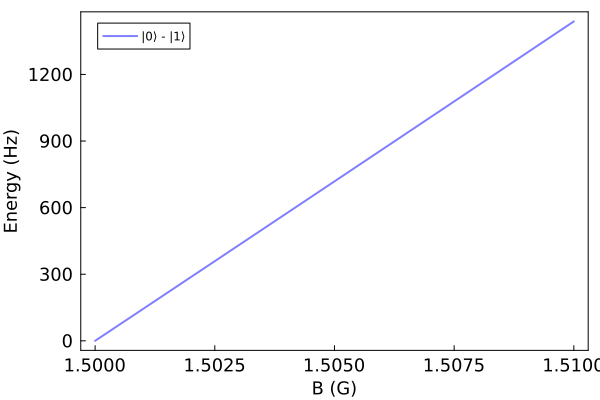

In [1327]:
using Plots, LaTeXStrings
Es_rel = matrix_values .- matrix_values[1,:]'
# plot(Bs, 1e6 .* (Es_rel), linewidth=2, linecolor=:blue, alpha=0.5, label="|0⟩ - |1⟩")
plot(Bs, 1e6 .* (Es_rel[:,idx_0] .- Es_rel[:,idx_1]), linewidth=2, linecolor=:blue, alpha=0.5, label="|0⟩ - |1⟩")
# plot!(Bs, 1e6 .* (Es_rel[:,idx_0] .- Es_rel[:,idx_e]), linewidth=2, linecolor=:green, alpha=0.5, label="|0⟩ - |e⟩")
# plot!(Bs, 1e6 .* (Es_rel[:,idx_1] .- Es_rel[:,idx_e]), linewidth=2, linecolor=:red, alpha=0.5, label="|1⟩ - |e⟩")
plot!(
    xlabel="B (G)",
    ylabel="Energy (Hz)",
    labelfontsize=12,
    tickfontsize=12,
    grid=:off,
    box=:on
    )

### Trap shift plots

In [1287]:
function H_func!(H, scan_values)
    H.parameters.I_scalar = scan_values[1]
    H.parameters.I_tensor = scan_values[1]
    evaluate!(H)
    solve!(H)
    return nothing
end
;

In [1288]:
Is = (0:0.01:1) .* (I_trap / (2ε_0 * c))
scan_params = (
    I = Is,
    );
iterator = Iterators.product
@time scan_values, _ = scan_parameters(deepcopy(H), scan_params, iterator, H_func!, H -> energy.(H.states), n_threads=10)
matrix_values = hcat(values(scan_values)...)'
;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


  0.581678 seconds (292.39 k allocations: 69.790 MiB, 242.56% compilation time)


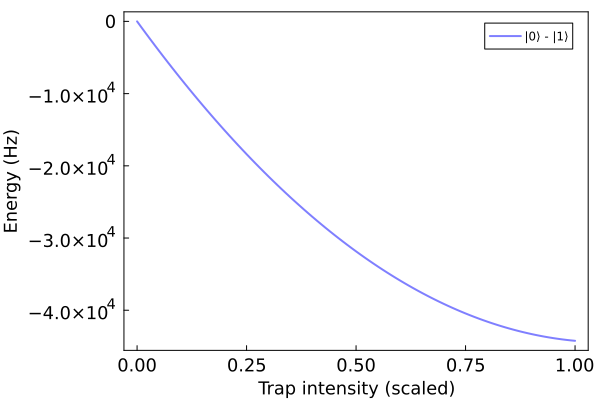

In [1289]:
using Plots, LaTeXStrings
Es_rel = matrix_values .- matrix_values[1,:]'
plot((0:0.01:1), 1e6 .* (Es_rel[:,idx_0] .- Es_rel[:,idx_1]), linewidth=2, linecolor=:blue, alpha=0.5, label="|0⟩ - |1⟩")
# plot!(Is, 1e6 .* (Es_rel[:,idx_0] .- Es_rel[:,idx_e]), linewidth=2, linecolor=:green, alpha=0.5, label="|0⟩ - |e⟩")
# plot!(Is, 1e6 .* (Es_rel[:,idx_1] .- Es_rel[:,idx_e]), linewidth=2, linecolor=:red, alpha=0.5, label="|1⟩ - |e⟩")
plot!(
    xlabel="Trap intensity (scaled)",
    ylabel="Energy (Hz)",
    labelfontsize=12,
    tickfontsize=12,
    grid=:off,
    box=:on
    )